## Week 12 Assignment - W200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. This assignment addresses material covered in Unit 11. Please upload this **Notebook** with your solutions to your GitHub repository in your SUBMISSIONS/week_12 folder by 11:59PM PST the night before class. If you turn-in anything on ISVC please do so under the Week 12 Assignment category. 

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1Lgg-PwXQ6TQLDowd6XyBxZw5g1NGWPjB/view?usp=sharing. You should download and save this file in the same folder as this notebook is stored.  This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

** DO NOT PUSH THIS FILE TO YOUR GITHUB REPO ! **

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say YOUR ANSWER HERE to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)

## Setup

Run the two cells below. 

The first cell will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.  

The second cell subsets the dataframe to focus on just the primary period through May 2016. Otherwise, we would see general election donations which would make it harder to draw conclusions about the primaries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Define a date parser to pass to read_csv
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

# Load the data
contrib = pd.read_csv('./P00000001-CA.csv', index_col=False, parse_dates=['contb_receipt_dt'], date_parser=d)
print(contrib.shape)

# Note - for now, it is okay to ignore the warning about mixed types. 

/Users/samueljohngomez/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1125659, 18)


In [2]:
# Subset data to primary period 
contrib = contrib.copy()[contrib['contb_receipt_dt'] <= datetime.datetime(2016, 5, 31)]
print(contrib.shape)

(654502, 18)


## 1. Data  Exploration (20 points)

**1a. First, take a preliminary look at the data.**
- Print the *shape* of the data. What does this tell you about the number of variables and rows you have?
- Print a list of column names. 
- Review the documentation for this data (link above). Do you have all of the columns you expect to have?
- Sometimes variable names are not clear unless we read the documentation. In your own words, based on the documentation, what information does the `election_tp` variable contain?

In [3]:
# 1a YOUR CODE HERE
print(contrib.shape,'\n')
print(list(contrib.columns), '\n')
print('Number of rows = ', contrib.shape[0], '\n')
print('Number of columns =', contrib.shape[1], '\n')

(654502, 18) 

['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city', 'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd', 'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'] 

Number of rows =  654502 

Number of columns = 18 



`1a YOUR RESPONSE HERE`

• The shape of the dataframe tells me there is 654,502 rows and 18 columns, roughly 11.781 million data points.  

• All of the columns in the documentation appear in the dataframe.

• The election type variable indicates the type of election for which the contribution was made. If the donation was made for the primary election in 2016 then the columns would have value P2016.

**1b. Print the first 5 rows from the dataset to manually check some of the data.** 

This is a good idea to ensure the data loaded and the columns parsed correctly!

In [4]:
# 1b YOUR CODE HERE
contrib.head(5)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","AULL, ANNE",LARKSPUR,CA,"949,391,913.00",NaN,RETIRED,50.00,2016-04-26,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4768722,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CARROLL, MARYJEAN",CAMBRIA,CA,"934,284,638.00",NaN,RETIRED,200.00,2016-04-20,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4747242,P2016
2,C00575795,P00003392,"Clinton, Hillary Rodham","GANDARA, DESIREE",FONTANA,CA,"923,371,507.00",NaN,RETIRED,5.00,2016-04-02,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4666603,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEE, ALAN",CAMARILLO,CA,"930,111,214.00",AT&T GOVERNMENT SOLUTIONS,SOFTWARE ENGINEER,40.00,2016-03-04,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWA097,P2016
4,C00577130,P60007168,"Sanders, Bernard","LEONELLI, ODETTE",REDONDO BEACH,CA,"902,784,310.00",VERICOR ENTERPRISES INC.,PHARMACIST,35.00,2016-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKX3MB3,P2016


**1c. Pick three variables from the dataset above and run some quick sanity checks.**

When working with a new dataset, it is important to explore and sanity check your variables. For example, you may want to examine the maximum and minimum values, a frequency count, or something else. Use the three markdown cells below to explain if your **three** chosen variables "pass" your sanity checks or if you have concerns about the integrity of your data and why. 

1C-1 Answer

In the code block below, I am checking to see if, in fact, all the data is from the Primary 2016 election.  By listing the unique election types, I am able to determine that there are data from three different elections.  For the remainder of this assignment, I will use data that only has election type 'P2016'.

In [5]:
group_elect_tp = contrib.groupby('election_tp')
display(group_elect_tp.count())
display(list(contrib['election_tp'].unique()))

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id
election_tp,,,,,,,,,,,,,,,,,
G2016,5064,5064,5064,5064,5064,5064,5064,3958,4448,5064,5064,2035,1596,1489,5064,5064,5064
P2016,649293,649293,649293,649293,649292,649293,649289,602839,644820,649293,649293,8300,24032,380065,649293,649293,649293
P2020,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


['P2016', 'G2016', nan, 'P2020']

1C-2 Answer

Next, I want to find out more information about the donations.  By running the describe command, I learned that some of the contributions are negative.  This is rather peculiar; I will not count negative values as a donation. 

In [6]:
# 1c YOUR CODE HERE for variable #2
display(contrib.contb_receipt_amt.describe())

count   654,502.00
mean        126.50
std         459.17
min     -10,000.00
25%          15.00
50%          27.00
75%          75.00
max      10,800.00
Name: contb_receipt_amt, dtype: float64

1C-3 Answer

It makes sense that most donations came from the most populated cities in California.  I also wanted to ensure that the data was comprised of only CA donation, and it turns out it is.  Also, Berkeley made the list.  Go Bears!

In [7]:
# 1c YOUR CODE HERE for variable #3
display(contrib.contbr_city.value_counts().head(10))
display(contrib.contbr_st.unique())

LOS ANGELES      48992
SAN FRANCISCO    44031
SAN DIEGO        23289
OAKLAND          16423
SAN JOSE         15718
BERKELEY         12550
SACRAMENTO       11356
LONG BEACH        7193
SANTA MONICA      7006
SANTA CRUZ        6663
Name: contbr_city, dtype: int64

array(['CA'], dtype=object)

**1d. Plotting a histogram** 

Make a histogram of **one** of the variables you picked above. What are some insights that you can see from this histogram? 
Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values
- Hint: For some variables the range of values is very large. To do a better exploration, make the initial histogram the full range and then you can make a smaller histogram 'zoomed' in on a discreet range.

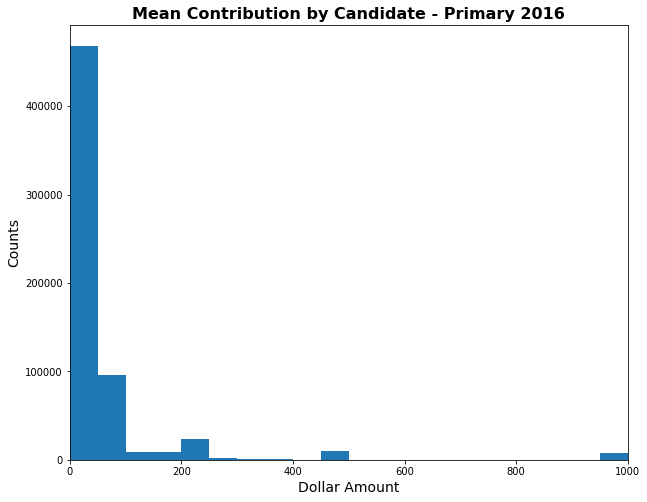

In [9]:
# 1d YOUR CODE HERE
contrib_p2016 = contrib.copy()
contrib_p2016 = contrib_p2016[contrib_p2016['election_tp']=='P2016']
group = contrib_p2016.groupby('cand_nm').mean()
grt_zero = contrib_p2016[contrib_p2016.contb_receipt_amt > 0]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
plt.hist(grt_zero.contb_receipt_amt, bins=216)
plt.title("Mean Contribution by Candidate - Primary 2016", fontsize=16, fontweight='bold')
plt.xlabel('Dollar Amount', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.xlim(0,1000)
plt.show()

`1d YOUR RESPONSE HERE`

From the histogram, I can determine that the majority of the donations less than 1000 dollars were in the 0 - 50 dollar range.

## 2. Exploring Campaign Contributions (30 points)

Let's investigate the donations to the candidates.

**2a. Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top. 
- 

Which candidate received the largest number of contributions (variable 'contb_receipt_amt')?

In [10]:
# 2a YOUR CODE HERE
# Filter for P2016 data.
contrib_p2016 = contrib[contrib['election_tp']=='P2016']
# Filter for contribuitons only(if the receipt amount is negative it should not be considered a donation).
contrib_p2016_donation = contrib_p2016[contrib_p2016['contb_receipt_amt']>0]
# Group contributions by candidate.
grouped_count = contrib_p2016_donation.groupby('cand_nm')['contb_receipt_amt'].count().sort_values(ascending=False)
grouped_count

cand_nm
Sanders, Bernard             369574
Clinton, Hillary Rodham      158990
Cruz, Rafael Edward 'Ted'     55158
Carson, Benjamin S.           26736
Rubio, Marco                  12730
Fiorina, Carly                 4629
Paul, Rand                     4144
Bush, Jeb                      2950
Kasich, John R.                2930
Trump, Donald J.               2159
Walker, Scott                   618
Huckabee, Mike                  520
O'Malley, Martin Joseph         390
Lessig, Lawrence                353
Christie, Christopher J.        323
Graham, Lindsey O.              286
Stein, Jill                     169
Webb, James Henry Jr.           106
Perry, James R. (Rick)          103
Santorum, Richard J.             84
Johnson, Gary                    68
Jindal, Bobby                    31
Pataki, George E.                20
Gilmore, James S III              3
Name: contb_receipt_amt, dtype: int64

`2a YOUR RESPONSE HERE`
Bernard Sanders received the most donations.

I first created a dataframe that only contained data from the primary 2016 election.  Next I created a data set that contained all positive donations made to the campaign.  

**2b. Now, present a table that shows the total value of donations to each candidate. sorted by total value of the donations**

Which candidate raised the most money in California?

In [11]:
# 2b YOUR CODE HERE
#get group practice async 13.03
don_by_cand = contrib.contb_receipt_amt.groupby(contrib.cand_nm)
don_by_cand.get_group(contrib.cand_nm[0])
# Group contb_receipt_amt column by candidate and state
grouped_sum = contrib_p2016.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending = False)
display(grouped_sum)

cand_nm
Clinton, Hillary Rodham     37,862,356.35
Sanders, Bernard            18,773,861.31
Cruz, Rafael Edward 'Ted'    5,928,828.27
Rubio, Marco                 5,000,680.92
Bush, Jeb                    3,316,836.83
Carson, Benjamin S.          3,022,105.15
Kasich, John R.              1,505,171.54
Fiorina, Carly               1,473,989.42
Paul, Rand                     721,563.14
Trump, Donald J.               696,727.30
Walker, Scott                  492,606.90
Christie, Christopher J.       456,066.00
Graham, Lindsey O.             379,495.00
O'Malley, Martin Joseph        297,334.26
Huckabee, Mike                 230,890.60
Perry, James R. (Rick)         208,400.00
Lessig, Lawrence               148,032.52
Webb, James Henry Jr.           76,568.16
Santorum, Richard J.            36,304.88
Johnson, Gary                   31,787.80
Pataki, George E.               30,450.00
Stein, Jill                     23,991.00
Jindal, Bobby                   23,231.26
Gilmore, James S III      

`2b YOUR RESPONSE HERE`
Hillary Clinton raised the most money in California.

I decided to leave the negative contributions because it made the balance 0 for the funds that were designated for the primary but redesignated to the general.

**2c. Combine the tables (sorted by either a or b above).**

- What is the "type" of the two tables you presented above - Series or DataFrames?
- Convert any Series to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

2c Response

The two tables I presented above were Pandas Series.

In [12]:
# 2c YOUR CODE HERE
print(type(grouped_count), type(grouped_sum))

df_cc = pd.DataFrame(grouped_count)
df_cc.columns = ['contribution_count']
df_ct = pd.DataFrame(grouped_sum)
df_ct.columns = ['contribution_total']
display(df_cc.head()) 
display(df_ct.head())

df = pd.merge(left=df_cc, right=df_ct, on='cand_nm')
df.sort_values(by='contribution_total', ascending = False, inplace=True)
df

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


,contribution_count
cand_nm,
"Sanders, Bernard",369574
"Clinton, Hillary Rodham",158990
"Cruz, Rafael Edward 'Ted'",55158
"Carson, Benjamin S.",26736
"Rubio, Marco",12730


,contribution_total
cand_nm,
"Clinton, Hillary Rodham","37,862,356.35"
"Sanders, Bernard","18,773,861.31"
"Cruz, Rafael Edward 'Ted'","5,928,828.27"
"Rubio, Marco","5,000,680.92"
"Bush, Jeb","3,316,836.83"


,contribution_count,contribution_total
cand_nm,,
"Clinton, Hillary Rodham",158990,"37,862,356.35"
"Sanders, Bernard",369574,"18,773,861.31"
"Cruz, Rafael Edward 'Ted'",55158,"5,928,828.27"
"Rubio, Marco",12730,"5,000,680.92"
"Bush, Jeb",2950,"3,316,836.83"
"Carson, Benjamin S.",26736,"3,022,105.15"
"Kasich, John R.",2930,"1,505,171.54"
"Fiorina, Carly",4629,"1,473,989.42"
"Paul, Rand",4144,"721,563.14"


**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation**

In [13]:
# 2d YOUR CODE HERE
df['contribution_average'] = df['contribution_total']/df['contribution_count']
df.sort_values(by='contribution_average', inplace=True)
df

,contribution_count,contribution_total,contribution_average
cand_nm,,,
"Sanders, Bernard",369574,"18,773,861.31",50.80
"Cruz, Rafael Edward 'Ted'",55158,"5,928,828.27",107.49
"Carson, Benjamin S.",26736,"3,022,105.15",113.04
"Stein, Jill",169,"23,991.00",141.96
"Paul, Rand",4144,"721,563.14",174.12
"Clinton, Hillary Rodham",158990,"37,862,356.35",238.14
"Fiorina, Carly",4629,"1,473,989.42",318.43
"Trump, Donald J.",2159,"696,727.30",322.71
"Rubio, Marco",12730,"5,000,680.92",392.83


**2e. Plotting a Bar Chart**

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Hint: Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

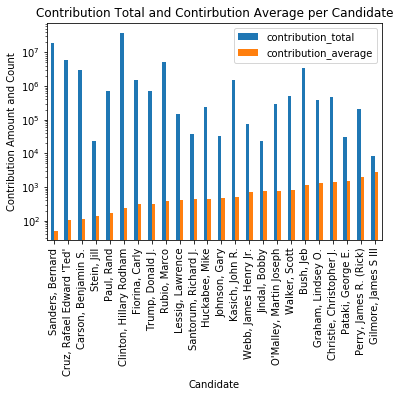

In [15]:
# 2e YOUR CODE HERE

df[['contribution_total', 'contribution_average']].plot(kind='bar')
plt.yscale('log')
plt.xlabel('Candidate')
plt.ylabel('Contribution Amount and Count')
plt.title('Contribution Total and Contirbution Average per Candidate')
plt.show()

**2f. Comment on the results of your data analysis in a short paragraph.**

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

`2f YOUR RESPONSE HERE`

The most obvious conclusion was that Bernie Sanders had the most contributions in California.  He had more than double that of Hillary Clinton.  However, Hillary raised two times more than Bernie--who also had the lowest average contribution of any candidate.  It is also apparent that California contributes more to Democratic candidates compared to Republican candidates.

## 3. Exploring Donor Occupations (30 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a. Show the top 5 occupations of individuals that contributed to Hillary Clinton.** 

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [16]:
contrib_hrc = contrib_p2016[contrib_p2016.cand_nm == 'Clinton, Hillary Rodham']
contrib_hrc['contbr_occupation'].value_counts().head(5)

RETIRED                  33121
ATTORNEY                  7148
INFORMATION REQUESTED     4741
TEACHER                   3575
HOMEMAKER                 3360
Name: contbr_occupation, dtype: int64

**3b. Write a function called `get_donors`.**

Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [17]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    return df['contbr_occupation'].value_counts().head(5)

**3c. Now run the `get_donors` function on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below.**

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [18]:
# 3c YOUR CODE HERE
print('Top five occupations that donated to: \n\nHillary Clinton:')
display(get_donors(contrib_p2016[contrib_p2016.cand_nm == 'Clinton, Hillary Rodham']))
print('Bernie Sanders:')
display(get_donors(contrib_p2016[contrib_p2016.cand_nm == 'Sanders, Bernard']))
print('Donald Trump:')
display(get_donors(contrib_p2016[contrib_p2016.cand_nm == 'Trump, Donald J.']))

Top five occupations that donated to: 

Hillary Clinton:


RETIRED                  33121
ATTORNEY                  7148
INFORMATION REQUESTED     4741
TEACHER                   3575
HOMEMAKER                 3360
Name: contbr_occupation, dtype: int64

Bernie Sanders:


NOT EMPLOYED         96371
RETIRED              15048
TEACHER              10167
SOFTWARE ENGINEER     7861
ENGINEER              7094
Name: contbr_occupation, dtype: int64

Donald Trump:


RETIRED                  831
INFORMATION REQUESTED     69
CEO                       52
OWNER                     50
PRESIDENT                 34
Name: contbr_occupation, dtype: int64

**3d. Finally, use `groupby` to separate the entire dataset by candidate.**

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [19]:
pd.set_option('display.max_rows', len(contrib.cand_nm.unique())*5)

In [20]:
# 3d YOUR CODE HERE
contrib_p2016.groupby('cand_nm').apply(get_donors)

cand_nm                                                          
Bush, Jeb                  RETIRED                                     992
                           HOMEMAKER                                   177
                           ATTORNEY                                     90
                           Q.A.                                         89
                           PRESIDENT                                    83
Carson, Benjamin S.        RETIRED                                   13635
                           INFORMATION REQUESTED PER BEST EFFORTS     1610
                           HOMEMAKER                                  1028
                           PHYSICIAN                                   321
                           R.N.                                        232
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e. Comment on your data insights & findings in a short paragraph.**

`3e YOUR RESPONSE HERE`

I found it interesting that most of Bernie Sanders' donations came from occupation unemployed.  It was also interesting to see that the occupation at the top of the list was retired for the majority of the candidates.  Homemaker was an occupation that struck me as somewhat odd for being one of the major occupaiton contributors.  Although Trump in don't have many donations in California it was interesting to see that occupations of CEO, Owner, and President comprised 3 of 5 contributor's occupations.

**3f. Think about your findings in section 3 vs. your findings in section 2 of this assignment.**

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

`3f YOUR RESPONSE HERE`

I better understand why Bernie had twice the number of contributors but half the total amount that Hillary raised. It makes sense that since the majority of his contributors were unemployed that he had the lowest average donation.  


## 4. Plotting Data (20 points)

There is an important element that we have not yet explored in this dataset - time.

**4a. Present a single line chart with the following elements.**

- Show the date on the x-axis
- Show the contribution amount on the y-axis
- Include a title
- Include axis labels

<Figure size 720x2160 with 0 Axes>

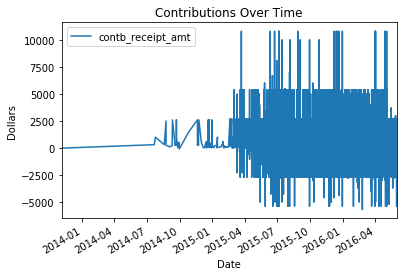

In [262]:
# 4a YOUR CODE HERE
plt.figure(figsize=(10,30))
contrib_p2016.plot(x='contb_receipt_dt', y='contb_receipt_amt')
plt.title('Contributions Over Time')
plt.xlabel('Date')
plt.ylabel('Dollars')
plt.show()


**4b. Make a better time-series line chart**

This chart is messy and it is hard to gain insights from it.  Improve the chart from 4a so that your new chart shows a specific insight. In the spot provided, write the insight(s) that can be gained from this new time-series line chart.

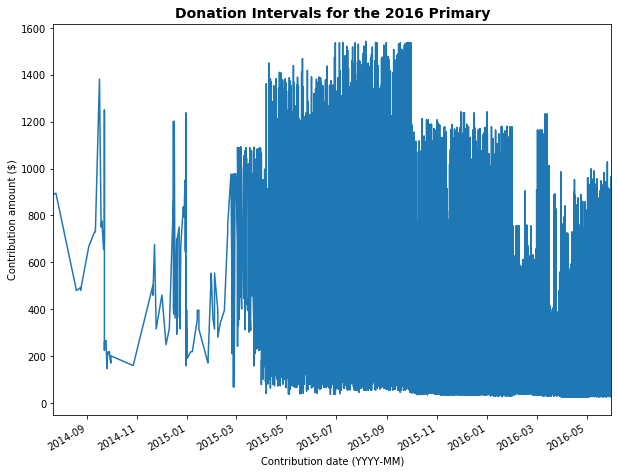

In [29]:
# 4b YOUR CODE HERE

grt_zero.set_index('contb_receipt_dt').contb_receipt_amt.rolling(window=200).mean().plot(figsize=(10,8))
ax = plt.gca()
ax.set_title('Donation Intervals for the 2016 Primary',fontweight='bold',fontsize=14)
ax.set_ylabel('Contribution amount ($)')
ax.set_xlabel('Contribution date (YYYY-MM)');



`4b YOUR RESPONSE HERE`

From this graph it is more clear when the most donations took place and the amount the donations were for the primary election.

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k